# Coffee Sales EDA
The data set contains data about coffee sales from a vending machine, capturing daily transaction data.

### Importing libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


### Load the data

In [37]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Practise/index.csv')
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [38]:
data.shape

(1208, 6)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1208 non-null   object 
 1   datetime     1208 non-null   object 
 2   cash_type    1208 non-null   object 
 3   card         1119 non-null   object 
 4   money        1208 non-null   float64
 5   coffee_name  1208 non-null   object 
dtypes: float64(1), object(5)
memory usage: 56.8+ KB


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1208.0,32.82846,5.107246,18.12,27.92,32.82,37.72,40.0


In [41]:
# Checking for null values
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [42]:
# Checking duplicates
data.duplicated().sum()

0

In [43]:
data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1208,2,card,1119
card,1119,474,ANON-0000-0000-0012,88
coffee_name,1208,8,Americano with Milk,293


In [44]:
data['card'].nunique()

474

In [45]:
data['cash_type'].value_counts()

,count
cash_type,
card,1119
cash,89


In [46]:
# checking the transactions with missing value in 'card'
data[data['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


Transactions which are missing values in card are done by cash

<Axes: >

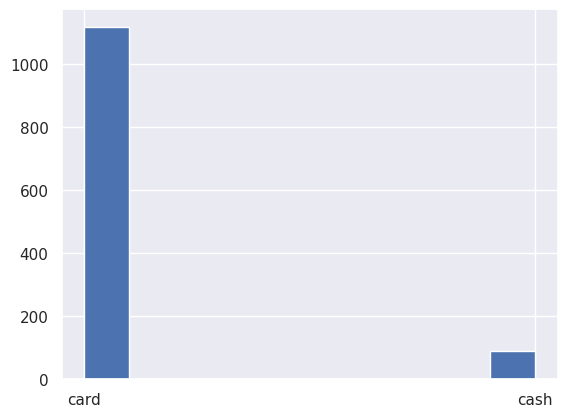

In [47]:
data['cash_type'].hist()

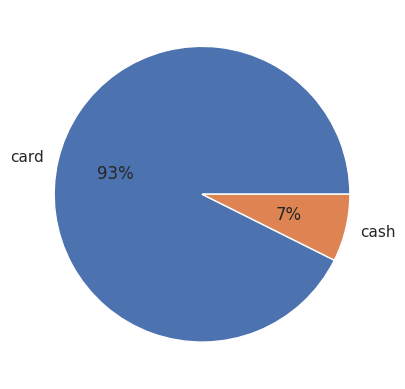

In [48]:
plt.pie(data['cash_type'].value_counts(), labels=data['cash_type'].value_counts().index, autopct='%.0f%%')
plt.show()

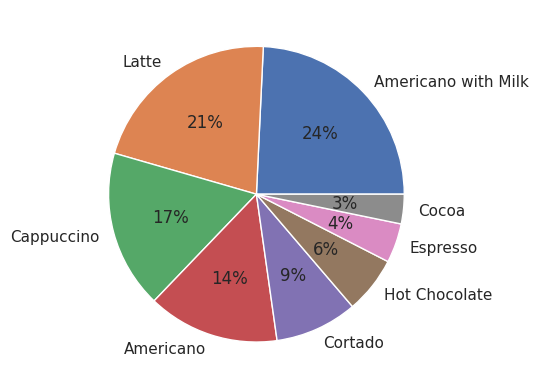

In [49]:
plt.pie(data['coffee_name'].value_counts(), labels=data['coffee_name'].value_counts().index, autopct='%.0f%%')
plt.show()

Dropping the card column as it has the card numbers which will be personal info and cannot be much usefull for us.

In [50]:
data = data.drop(columns='card')
data.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


Using plotly for visualization

In [51]:
import plotly.express as px

In [52]:
fig = px.bar(
    x = data['coffee_name'].value_counts().index,
    y = data['coffee_name'].value_counts().values,
    labels = {'x': 'Coffee Type', 'y':'count'},
    title = "Most popular coffee type"
)

fig.show()

In [53]:
fig = px.bar(
    x = data['cash_type'].value_counts().index,
    y = data['cash_type'].value_counts().values,
    labels = {'x': 'Payment Type', 'y':'count'},
    title = "Mode of payments"
)

fig.show()

Calculating profit based on the coffee type from the entire dataset

In [54]:
profit = data.groupby('coffee_name')['money'].sum()
profit

,money
coffee_name,
Americano,4759.64
Americano with Milk,9299.94
Cappuccino,7759.80
Cocoa,1427.22
Cortado,2975.28
Espresso,1154.98
Hot Chocolate,2811.30
Latte,9468.62


In [55]:
fig = px.bar(
    x=profit.index,
    y=profit.values,
    labels={"x": "Coffee Type", "y": "Revenue"},
    title="Profit by Coffee Type",
    text = profit.values
)

fig.show()

Most sold coffee by hour of the day

In [56]:
# Convereting the date time column to date time format
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = pd.to_datetime(data['date'])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1208 non-null   datetime64[ns]
 1   datetime     1208 non-null   datetime64[ns]
 2   cash_type    1208 non-null   object        
 3   money        1208 non-null   float64       
 4   coffee_name  1208 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 47.3+ KB


In [58]:
# extracting the hour, day, month and year from date time
# Hour
data['hour'] = data['datetime'].dt.hour

# Day
data['day'] = data['datetime'].dt.day

#Day of week
data['day_of_week'] = data['datetime'].dt.day_of_week

#Day name
data['day_name'] = data['datetime'].dt.strftime('%A')

# Month
data['month'] = data['datetime'].dt.month

#Year
data['year'] = data['datetime'].dt.year

data.head()

,date,datetime,cash_type,money,coffee_name,hour,day,day_of_week,day_name,month,year
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte,10,1,4,Friday,3,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,12,1,4,Friday,3,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,12,1,4,Friday,3,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano,13,1,4,Friday,3,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte,13,1,4,Friday,3,2024


In [59]:
data.describe()

,date,datetime,money,hour,day,day_of_week,month,year
count,1208,1208,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.0
mean,2024-05-24 06:15:29.801324544,2024-05-24 21:16:54.525428736,32.828460,14.538079,16.025662,2.933775,5.263245,2024.0
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000,7.000000,1.000000,0.000000,3.000000,2024.0
25%,2024-04-16 00:00:00,2024-04-16 10:45:46.756249856,27.920000,11.000000,8.000000,1.000000,4.000000,2024.0
50%,2024-05-26 00:00:00,2024-05-26 18:26:16.546499840,32.820000,14.000000,16.000000,3.000000,5.000000,2024.0
75%,2024-07-03 00:00:00,2024-07-03 14:23:45.339750144,37.720000,18.000000,24.000000,5.000000,7.000000,2024.0
max,2024-08-08 00:00:00,2024-08-08 21:25:59.265000,40.000000,22.000000,31.000000,6.000000,8.000000,2024.0
std,NaN,NaN,5.107246,4.105914,9.159193,1.966307,1.519355,0.0


The data set is captured between 1st march 2024 to 31st july 2024

In [60]:
data['year'].value_counts()

,count
year,
2024,1208


In [61]:
# As the entire data is from 2024, we dont need the year col. It can be dropped
data = data.drop(columns='year')
data.head()

,date,datetime,cash_type,money,coffee_name,hour,day,day_of_week,day_name,month
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte,10,1,4,Friday,3
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,12,1,4,Friday,3
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,12,1,4,Friday,3
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano,13,1,4,Friday,3
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte,13,1,4,Friday,3


In [62]:
# Counting the number of coffees sold per hour
hourly_sales = data['hour'].value_counts().sort_index()

In [63]:
hourly_sales

,count
hour,
7,14
8,50
9,56
10,137
11,113
12,93
13,83
14,76
15,68


In [64]:
# creating data frame from the hourly sales
hourly_sales_df = pd.DataFrame({
    'hour':hourly_sales.index,
    'count':hourly_sales.values
})

In [65]:
# plotting the hourly profit
fig = px.bar(
    hourly_sales_df,  # Pass the DataFrame here
    x='hour',
    y='count',
    labels={'x': "Hour", 'y': "Number of Coffees Sold"},
    title="Coffees Sold by Hour",
    hover_data=['count'],  # Reference the 'count' column in the DataFrame
    hover_name='hour',   # Use the 'hour' column as the hover name
    text='count'         # Display the count on the bars
)
# Customize the hover template
fig.update_traces(
    hovertemplate="At %{x}hr, %{y} coffees sold"
)

fig.show()

In [66]:
# hourly sales by coffee_name

hourly_sales_by_coffee = data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour', columns='coffee_name', values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5.0,5.0,1.0,0.0,1.0,0.0,0.0,2.0
1,8,10.0,9.0,9.0,1.0,8.0,1.0,0.0,12.0
2,9,8.0,22.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,33.0,10.0,4.0,9.0,2.0,8.0,51.0
4,11,21.0,29.0,17.0,1.0,17.0,7.0,8.0,13.0
5,12,16.0,28.0,15.0,3.0,9.0,6.0,3.0,13.0
6,13,18.0,18.0,13.0,2.0,13.0,4.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,16.0,10.0,0.0,3.0,4.0,6.0,15.0
9,16,12.0,20.0,13.0,3.0,12.0,5.0,4.0,15.0


In [67]:
type(hourly_sales_by_coffee)

pandas.core.frame.DataFrame

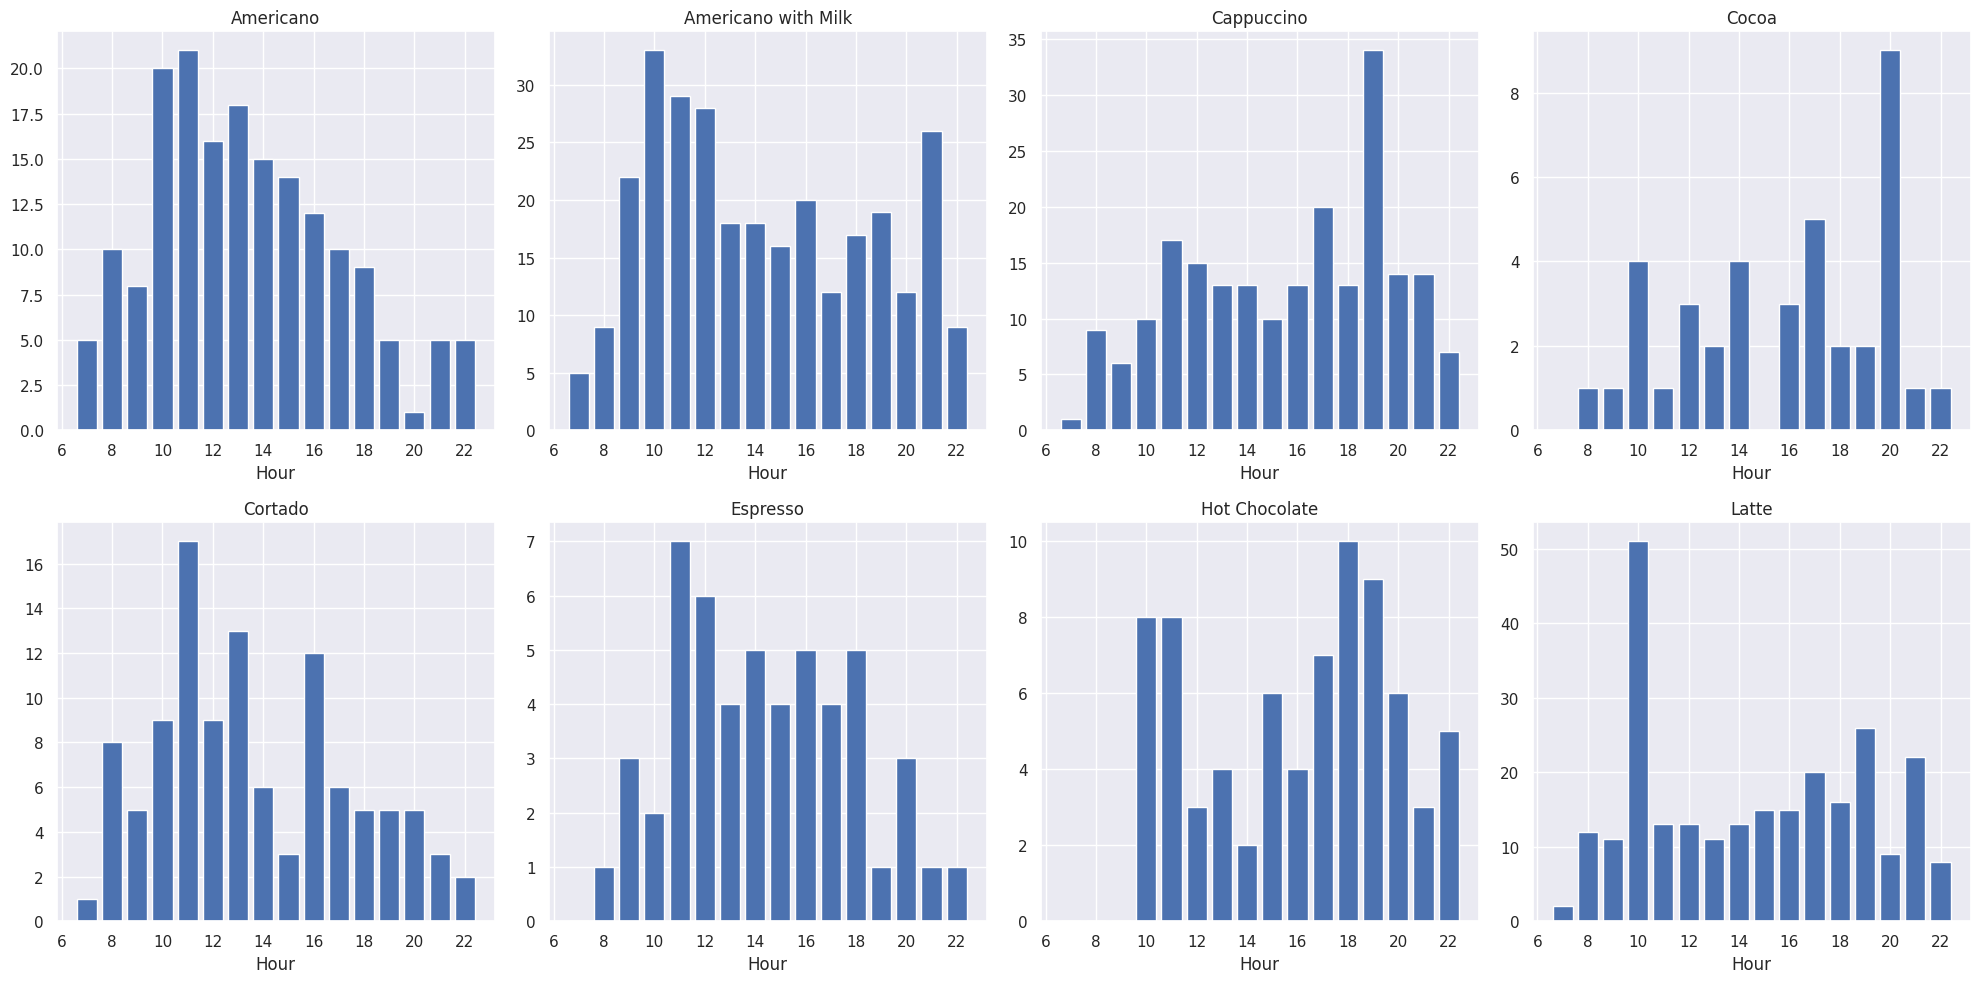

In [68]:
fig, axs = plt.subplots(2,4,figsize=(20,10))

#Flatten array of subplots for easy iteration
axs = axs.flatten()

# Loop through each col of df skipping the index column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
  axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
  axs[i].set_title(f'{column}')
  axs[i].set_xlabel('Hour')

plt.tight_layout()
plt.show()

Monthly sales

In [71]:
monthly_sales = data.groupby(['coffee_name', 'month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month', columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56
5,8,5,25,13,4,10,3,1,14


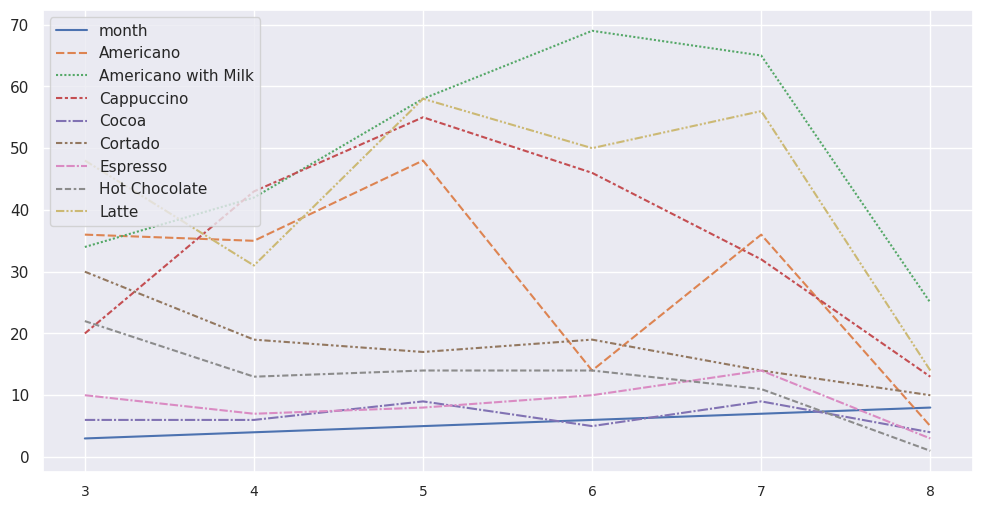

In [72]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])), monthly_sales['month'], size='small')
plt.show()

In [73]:
data['day_of_week'].value_counts()

,count
day_of_week,
1,193
3,184
2,175
4,168
5,167
0,164
6,157


In [74]:
# Weekday sales
weekday_sales = data.groupby(['day_name']).count()['datetime'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day_name,datetime
0,Friday,168
1,Monday,164
2,Saturday,167
3,Sunday,157
4,Thursday,184
5,Tuesday,193
6,Wednesday,175


In [75]:
# creating data frame from the weekly sales
weekly_sales_df = pd.DataFrame({
    'day_name':weekday_sales.day_name,
    'count':weekday_sales.datetime
})

In [76]:
# plotting the weekly sales
fig = px.bar(
    weekly_sales_df,  # Pass the DataFrame here
    x='day_name',
    y='count',
    labels={'x': "Day of week", 'y': "Number of Coffees Sold"},
    title="Coffees Sold by weekday",
    hover_data=['count'],  # Reference the 'count' column in the DataFrame
    hover_name='day_name',   # Use the 'hour' column as the hover name
    text='count'         # Display the count on the bars
)
# Customize the hover template
fig.update_traces(
    hovertemplate="On %{x}s, %{y} coffees sold"
)

fig.show()